In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

#set precision for displaying float-point values in the notebook
pd.options.display.float_format = '{:,.3f}'.format

#set figure dpi to 100 to get reasonably sized figures displayed in the notebook
plt.rc('figure', dpi=100)

#set savefig dpi to 300 to get high-quality images to insert in the paper
plt.rc('savefig', dpi=300)

#set to 'pdf' or 'eps' for vector figures or to 'png'
plt.rc('savefig', format='png')

#set font sizes for figures throughout
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=12)

#set directory to save figures to
fig_path = 'figures/%s'

In [2]:
import data_reader, trajectory_plotter

dr = data_reader.DataReader()
tp = trajectory_plotter.TrajectoryPlotter()
choices, dynamics, gamble = dr.get_data(path='../../data/eyehand_confidence/processed/')
choices['subj_id'] = choices.index.get_level_values('subj_id')
choices['log_RT'] = np.log(choices.response_time)

In [3]:
def get_psychometric_function(choices, variables = ['subj_id', 'coherence'], flatten=True):
    n_correct = choices[choices.is_correct==True].groupby(variables).size()
    n = choices.groupby(variables).size()

    rate_correct = n_correct/n
    rate_correct.name = 'p_correct'

    if flatten:
        rate_correct = rate_correct.to_frame().reset_index()
        rate_correct.fillna(0)
    return rate_correct

def filter_poor_performers(choices, psych_func):
    poor_performers = psych_func[((psych_func.p_correct<0.65) & \
                                 (psych_func.coherence==0.128)) | 
                                 ((psych_func.p_correct<0.75) & \
                                 (psych_func.coherence==0.256))].subj_id.unique()
#    poor_performers = np.append(poor_performers, [132, 850])                       
    choices = choices[~choices.subj_id.isin(poor_performers)]
    return choices

psych_func = get_psychometric_function(choices, variables = ['subj_id', 'coherence'])
choices = filter_poor_performers(choices, psych_func)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'subj_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'subj_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


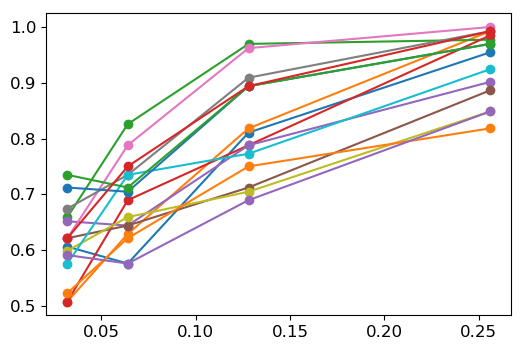

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
for subj_id in choices.subj_id.unique():
#     sns.factorplot(data=choices.loc[subj_id], x='coherence', y='is_correct', ci=95, ax=ax)
    plt.plot(psych_func[psych_func.subj_id == subj_id].coherence, psych_func[psych_func.subj_id == subj_id].p_correct, marker='o')

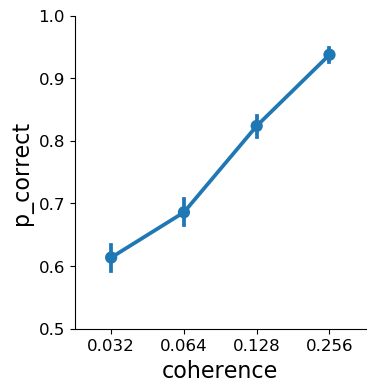

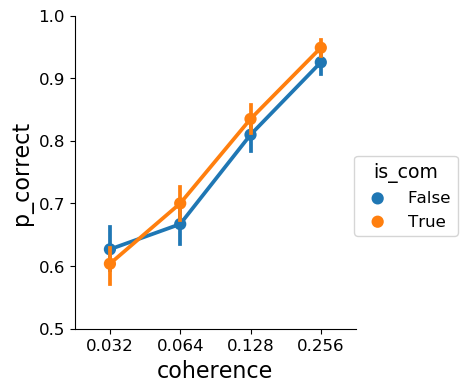

In [5]:
fig = sns.factorplot(data=choices, x='coherence', y='is_correct', ci=95)
fig.ax.set_ylim(0.5, 1.0);
fig.ax.set_ylabel('p_correct');
plt.savefig(fig_path % 'p_correct')

fig = sns.factorplot(data=choices, x='coherence', y='is_correct', hue='is_com', ci=95)
fig.ax.set_ylim(0.5, 1.0);
fig.ax.set_ylabel('p_correct');
plt.savefig(fig_path % 'p_correct_com')

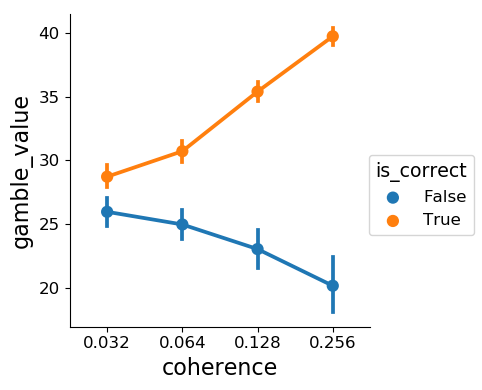

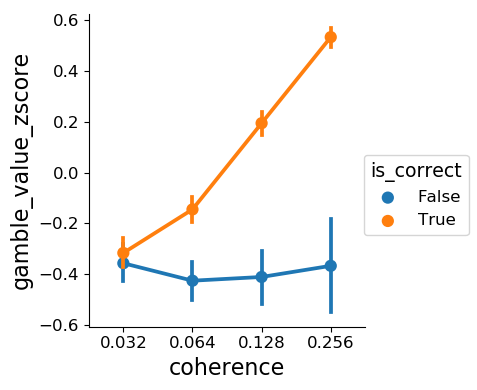

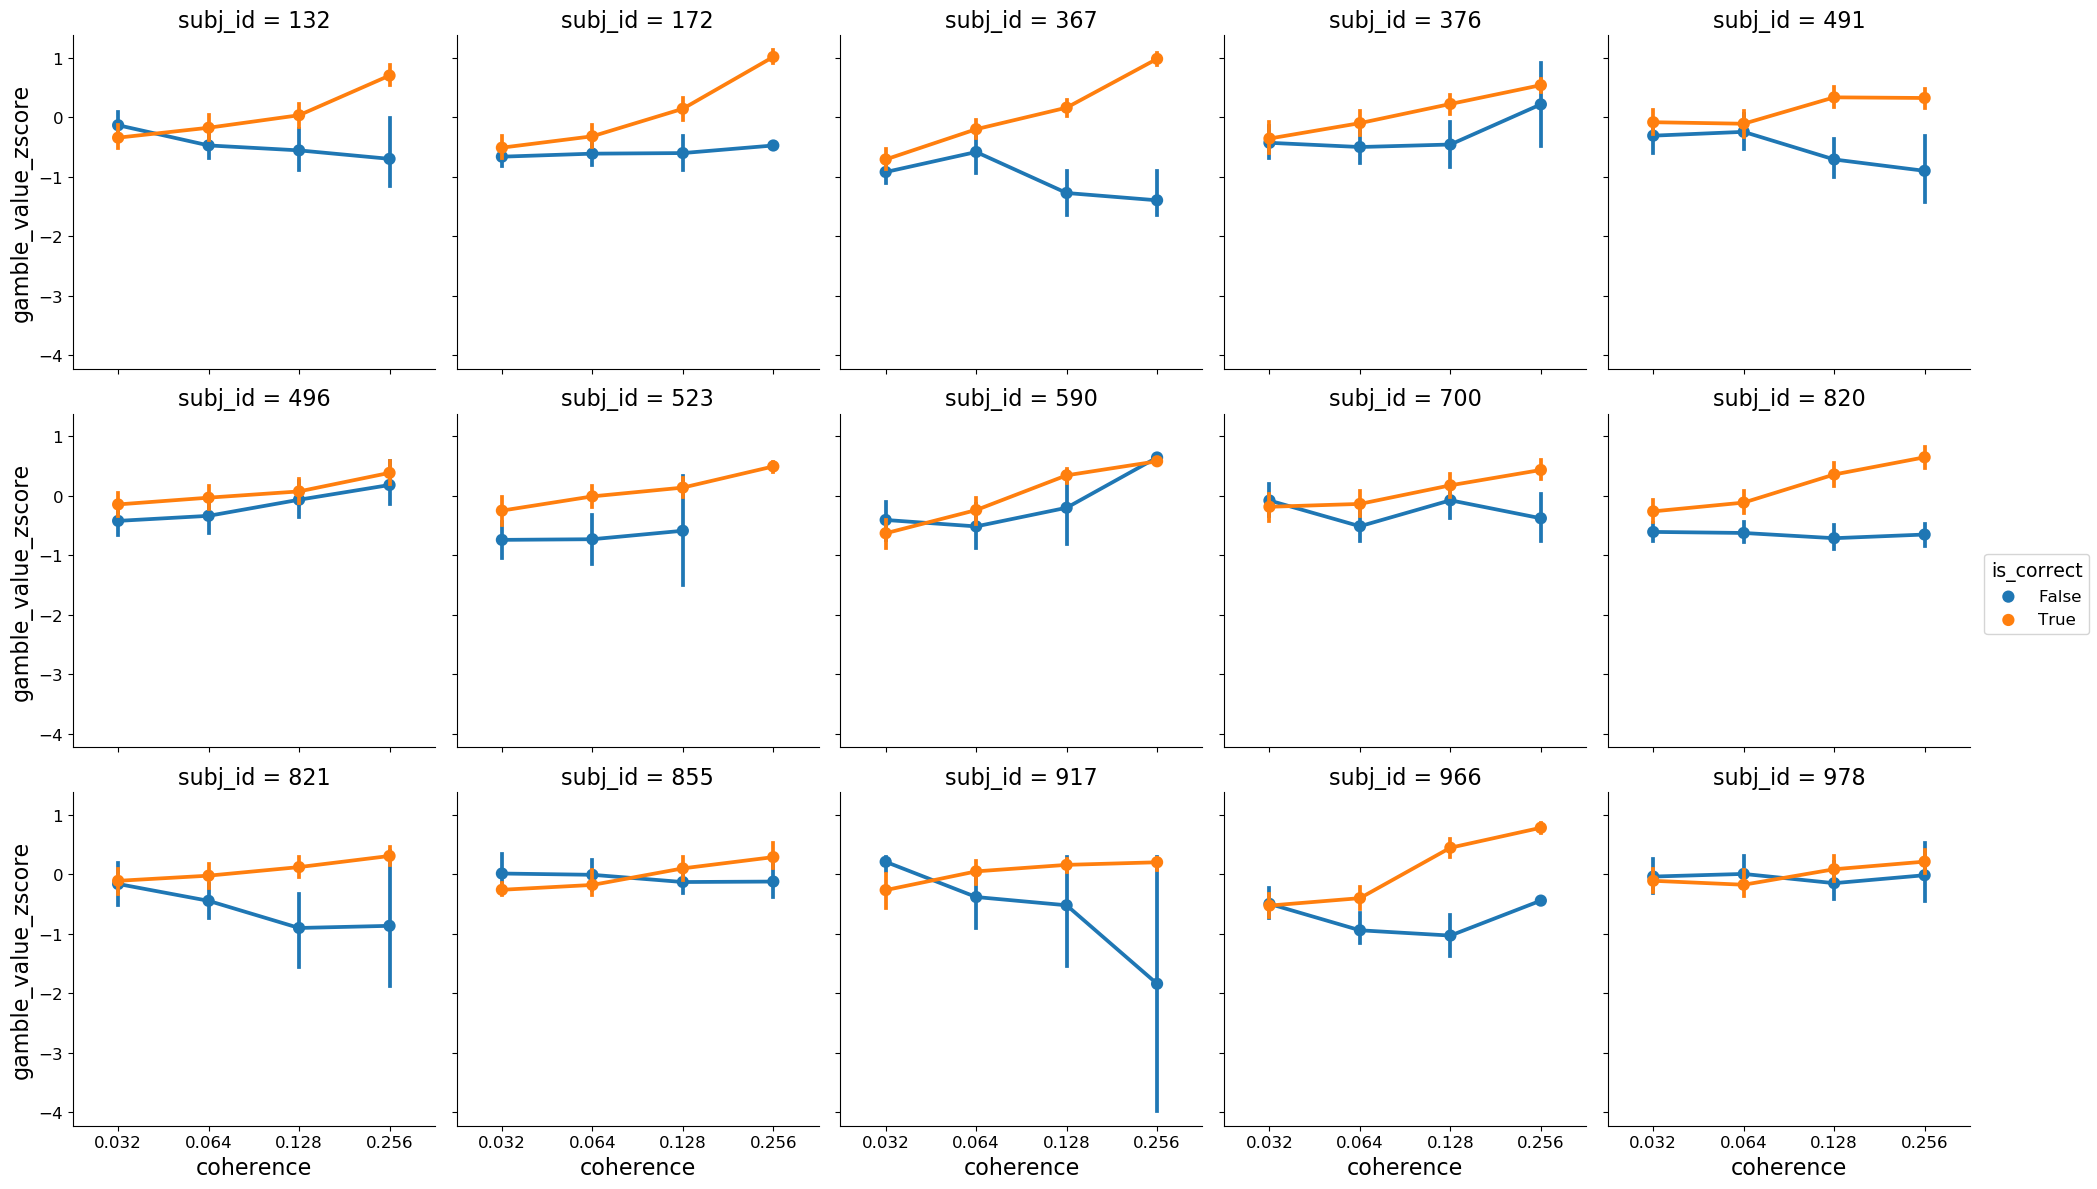

In [6]:
sns.factorplot(data=choices, x='coherence', y='gamble_value', hue='is_correct')
plt.savefig(fig_path % 'gamble')
sns.factorplot(data=choices, x='coherence', y='gamble_value_zscore', hue='is_correct')
plt.savefig(fig_path % 'gamble_z')
sns.factorplot(data=choices, x='coherence', y='gamble_value_zscore', hue='is_correct', col='subj_id', col_wrap=5)
plt.savefig(fig_path % 'gamble_z_subj')

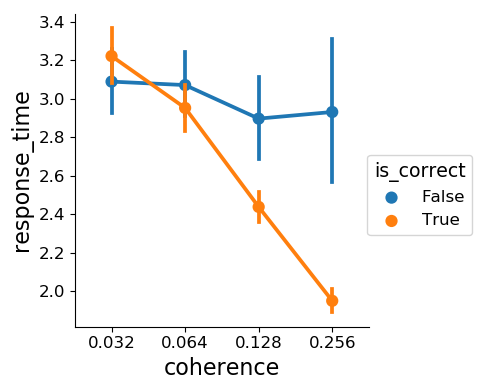

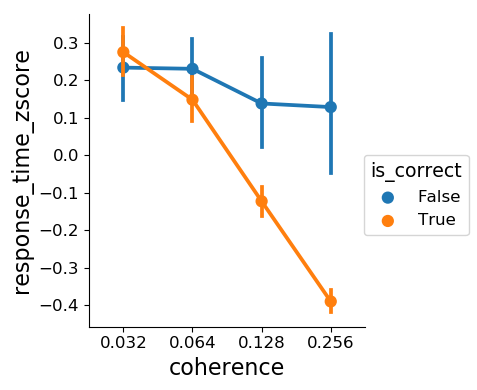

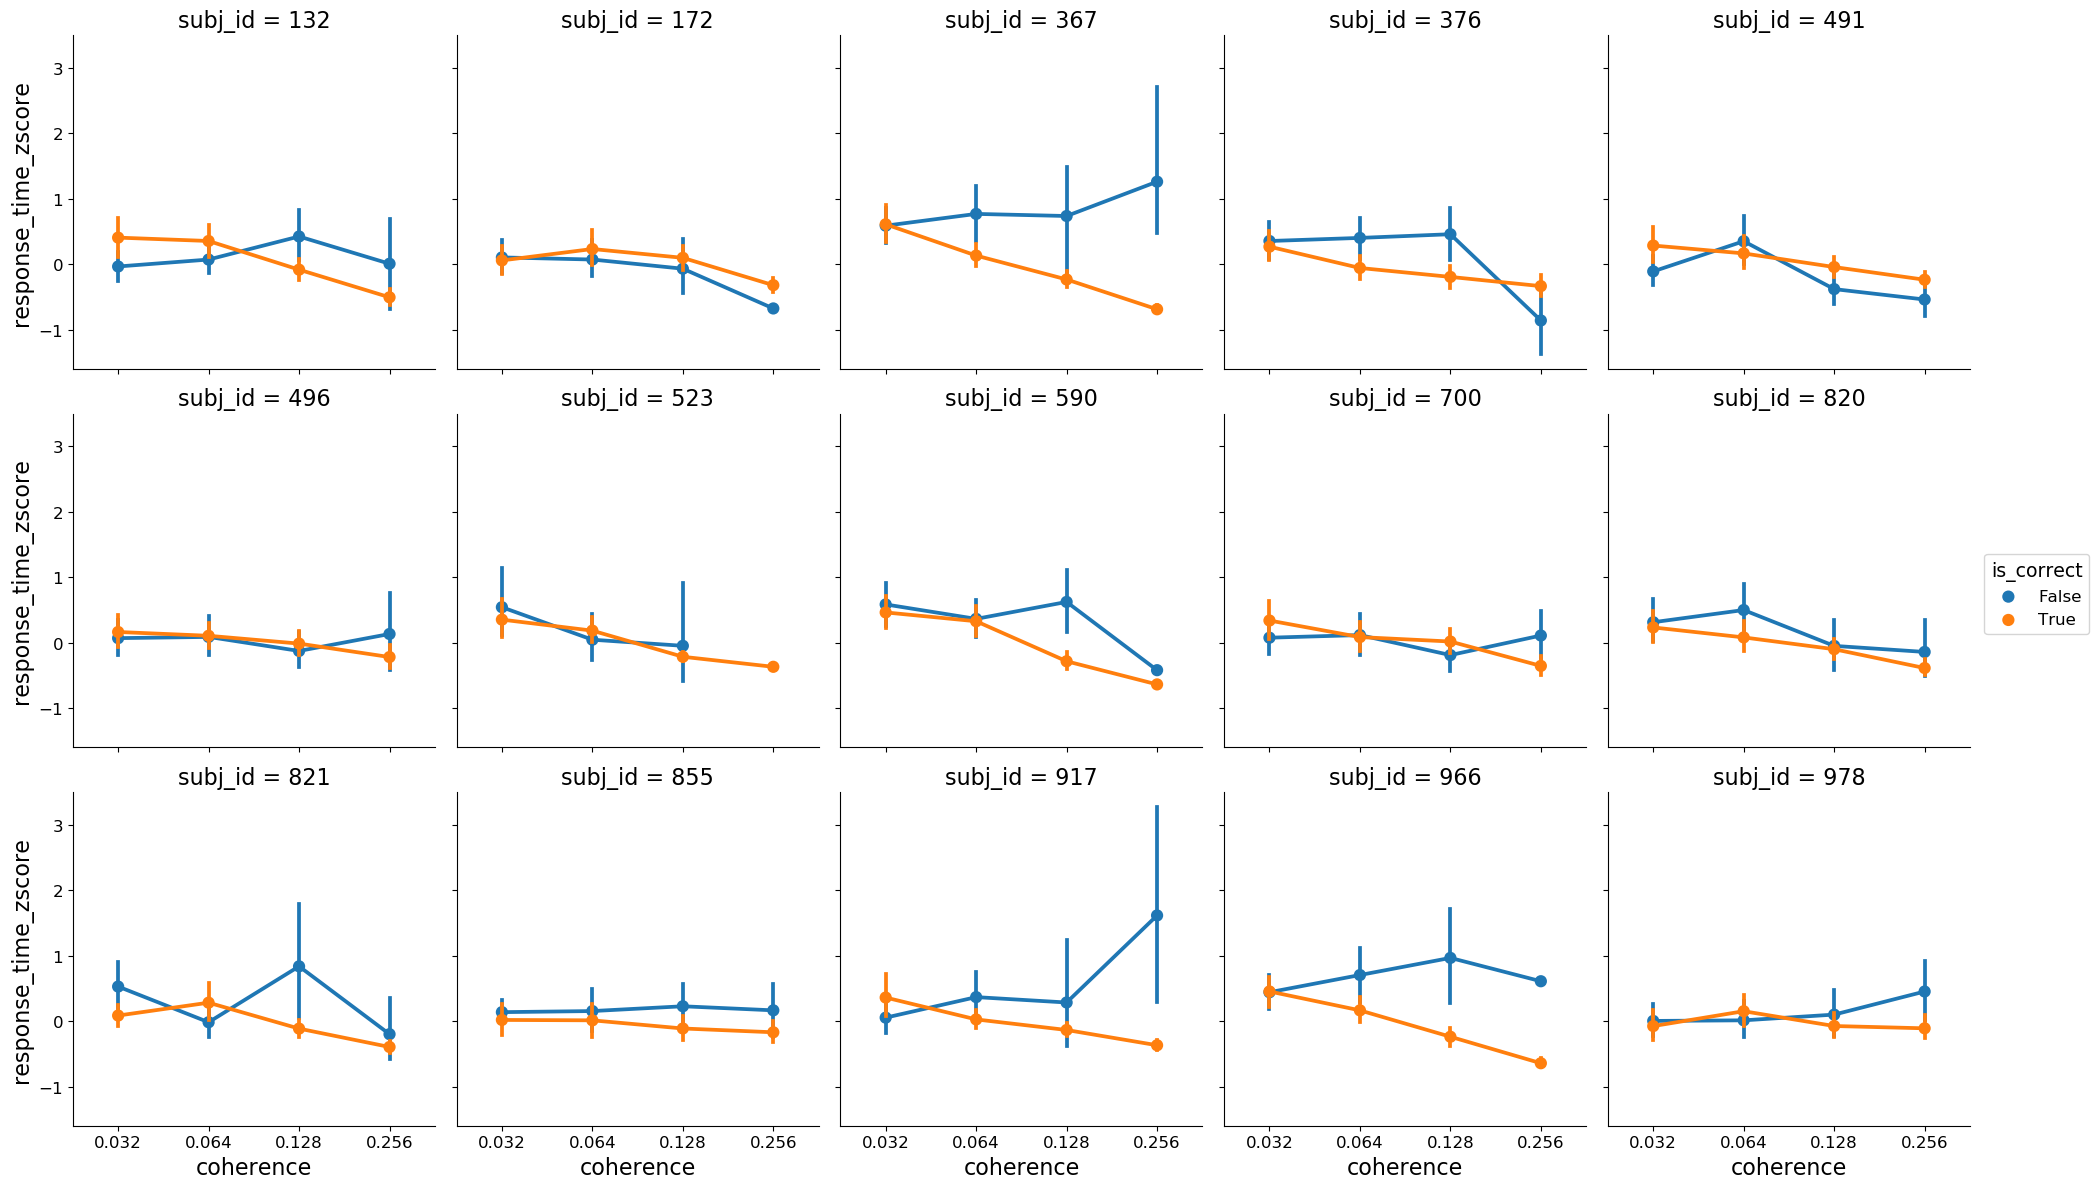

In [7]:
sns.factorplot(data=choices, x='coherence', y='response_time', hue='is_correct')
plt.savefig(fig_path % 'rt')
sns.factorplot(data=choices, x='coherence', y='response_time_zscore', hue='is_correct')
plt.savefig(fig_path % 'rt_z')
sns.factorplot(data=choices, x='coherence', y='response_time_zscore', hue='is_correct', col='subj_id', col_wrap=5)
plt.savefig(fig_path % 'rt_z_subj')

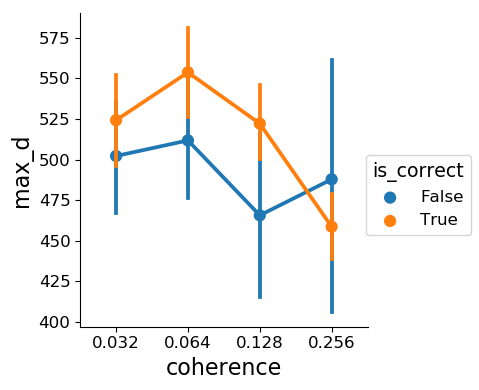

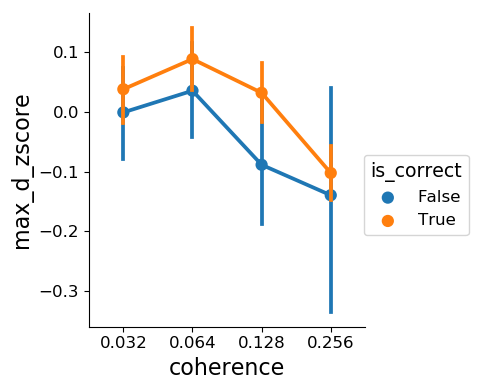

In [8]:
sns.factorplot(data=choices, x='coherence', y='max_d', hue='is_correct', kind='point')
plt.savefig(fig_path % 'max_d')
sns.factorplot(data=choices, x='coherence', y='max_d_zscore', hue='is_correct', kind='point')
plt.savefig(fig_path % 'max_d_z')

In [9]:
from scipy.stats import ttest_ind

def ttest(choices, var, cond_1, cond_2):
    t, p = ttest_ind(choices.loc[cond_1, var], 
                     choices.loc[cond_2, var],
                     equal_var=False)
    return (t, p)
    
print ("Welch's t: %.2f, p=%.6f" % (ttest(choices=choices, var='max_d_zscore', 
                                        cond_1=choices.coherence==0.032, 
                                        cond_2=choices.coherence==0.064)))

Welch's t: -1.52, p=0.129679


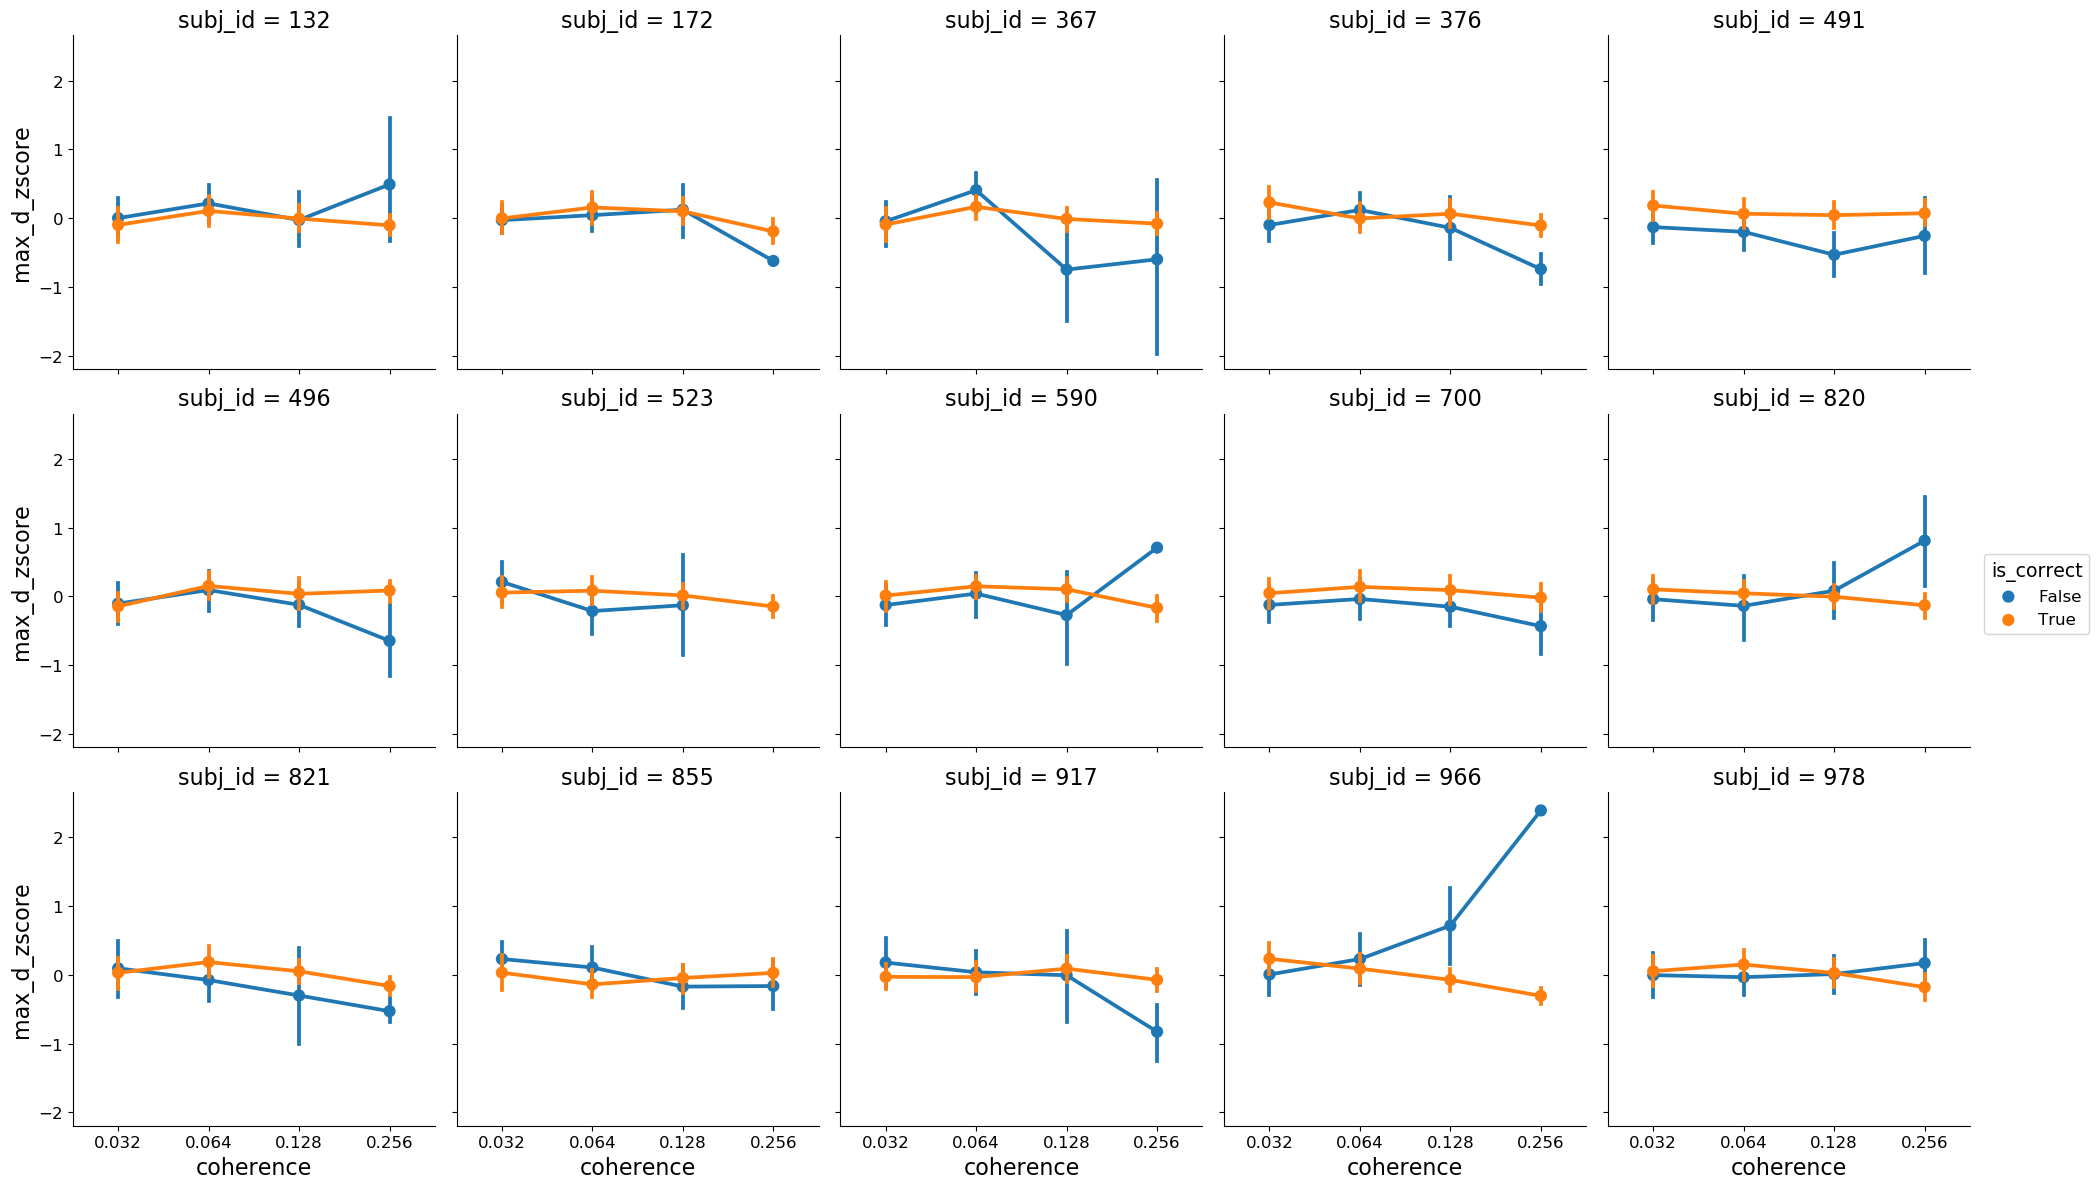

In [10]:
fig = sns.factorplot(data=choices, x='coherence', y='max_d_zscore', hue='is_correct', col='subj_id', col_wrap=5, kind='point')
plt.savefig(fig_path % 'max_d_z_subj')

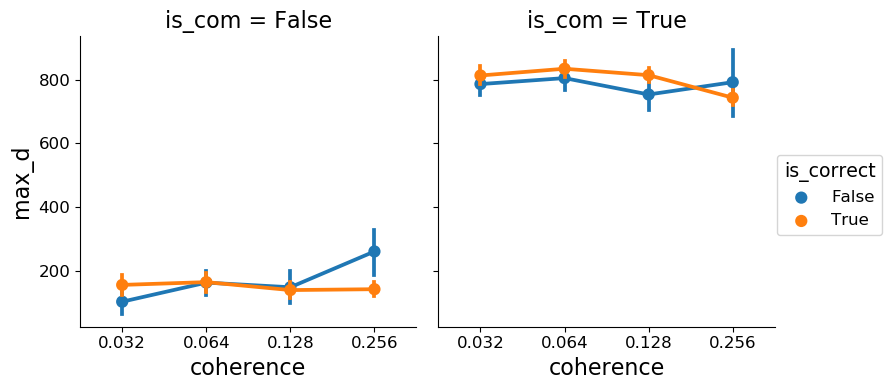

In [11]:
sns.factorplot(data=choices, x='coherence', y='max_d', hue='is_correct', col='is_com')
plt.savefig(fig_path % 'max_d_col_is_com')

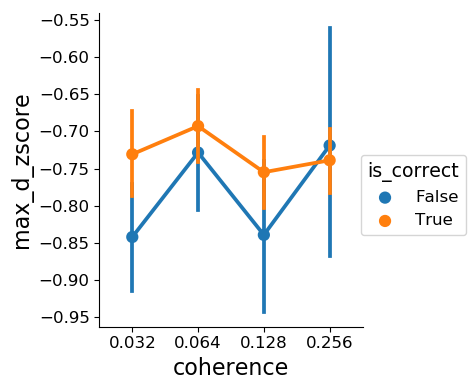

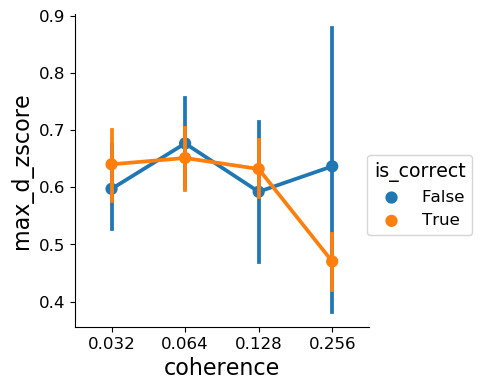

In [12]:
sns.factorplot(data=choices[(~choices.is_com)], x='coherence', y='max_d_zscore', hue='is_correct')
sns.factorplot(data=choices[choices.is_com], x='coherence', y='max_d_zscore', hue='is_correct')

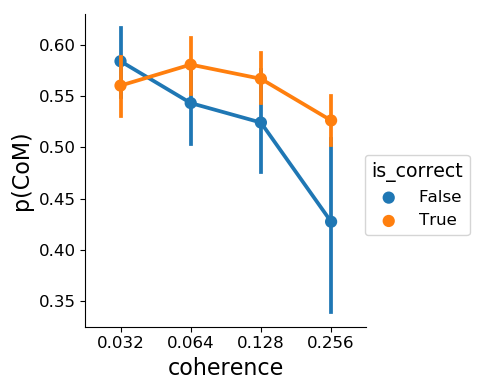

In [13]:
f = sns.factorplot(data=choices, x='coherence', y='is_com', hue='is_correct', kind='point')
f.ax.set_ylabel('p(CoM)')
plt.savefig(fig_path % 'p_com')

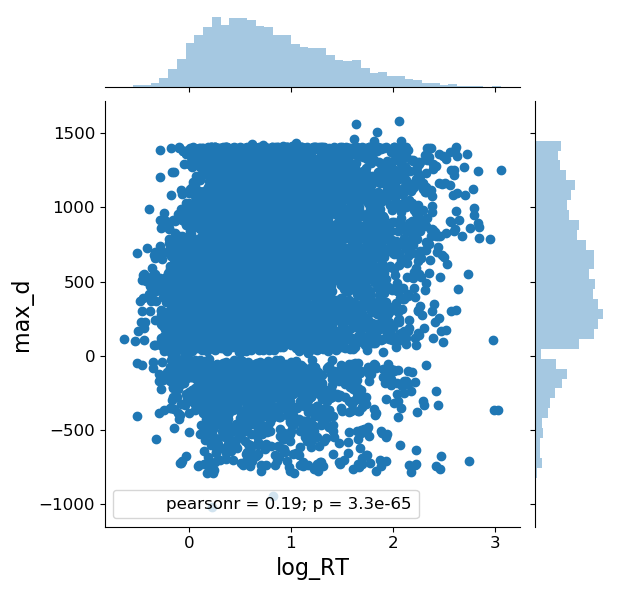

In [14]:
# sns.factorplot(data=choices, x='gamble_value', y='response_time', col='coherence')
# plt.savefig('gamble_rt')
# sns.factorplot(data=choices, x='gamble_value', y='max_d', col='coherence')
# plt.savefig('gamble_max_d')
sns.jointplot(data=choices, x='log_RT', y='max_d')
plt.savefig(fig_path % 'RT_max_d')